#Programas de TV e filmes da Netflix, Preço das ações da Netflix e Os 10 melhores diários da Netflix.


Ana Paula Cardoso de Castro Kendall

Francelino Teotonio Júnior

Vivianny Khatly Medeiros Pereira


#Introdução

Nesse projeto foi usados os datasets dos sites 
(https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies?select=titles.csv)

(https://www.kaggle.com/datasets/akpmpr/updated-netflix-stock-price-all-time)

(https://www.kaggle.com/datasets/prasertk/netflix-daily-top-10-in-us)

 para analisar os dados da Netflix e foi construído para saber se a duração do filme influencia na sua popularidade? O gênero influencia o quão longo o filme vai ser? A Netflix é mais valiosa quando o seu catálogo está bom?

#Dados Usados

Para os dados usados foi requerido o dataset do site kaggle chamado "catalog.csv", "daily_top_10.csv" e "stocks.csv" que consta Listagens de filmes e programas de TV na Netflix (julho de 2022) a Preço atualizado das ações da Netflix, desde seu IPO (23 de maio de 2002) e Os 10 melhores filmes/programas de TV diários da Netflix nos Estados Unidos de 2020 a março de 2022.

#Variáveis

dataset = catalog.csv

dataset = daily top 10.csv

dataset = stocks.csv

runtime = tempo de execução do filme

imdb_score = Internet Movie Database avaliação de filmes

Viewership Score = Pontuação de audiência

Adj Close = Ajuste Fechar

Days In Top 10 = Dias no top 10

#Perguntas:

Os espectadores preferem filmes curtos, longos ou de duração média?
    
    > comparar a média do ranking total com a media do ranking nos seguintes intervalos:

    > curto: até 80 minutos
    > normal: 81 a 140 minutos
    > longo: mais de 140 minutos 

O gênero influencia na duração do filme?

    > observar a correlação entre genero e duração do filme

A Netflix é mais valiosa quando o seu catálogo está bom?

    > observar a correlação entre a média de avaliações do daily top ten com o preço da ação

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd
from scipy import stats
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
%matplotlib inline

catalog_df = pd.read_csv("catalog.csv")
movies_df = catalog_df.loc[catalog_df.type == "MOVIE"]

daily_top10_df = pd.read_csv("daily top 10.csv")
stocks_df = pd.read_csv("stocks.csv")


In [12]:
movies_df

,id,title,type,release_year,runtime,genres,imdb_score
0,tm84618,Taxi Driver,MOVIE,1976,114,"['drama', 'crime']",8.2
1,tm154986,Deliverance,MOVIE,1972,109,"['drama', 'action', 'thriller', 'european']",7.7
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"['fantasy', 'action', 'comedy']",8.2
3,tm120801,The Dirty Dozen,MOVIE,1967,150,"['war', 'action']",7.7
5,tm70993,Life of Brian,MOVIE,1979,94,['comedy'],8.0
...,...,...,...,...,...,...,...
5362,tm1066324,Super Monsters: Once Upon a Rhyme,MOVIE,2021,25,"['animation', 'family']",5.6
5363,tm1097142,My Bride,MOVIE,2021,93,"['romance', 'comedy', 'drama']",5.0
5364,tm1014599,Fine Wine,MOVIE,2021,100,"['romance', 'drama']",6.8
5365,tm898842,C/O Kaadhal,MOVIE,2021,134,['drama'],7.7


In [13]:
stocks_df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
1,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000
2,2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143
3,2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571
4,2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429
...,...,...,...,...,...,...,...
4876,2021-10-05,640.390015,606.890015,606.940002,634.809998,9534300.0,634.809998
4877,2021-10-06,639.869995,626.359985,628.179993,639.099976,4580400.0,639.099976
4878,2021-10-07,646.840027,630.450012,642.229980,631.849976,3556900.0,631.849976
4879,2021-10-08,643.799988,630.859985,634.169983,632.659973,3271100.0,632.659973


In [14]:
catalog_df

,id,title,type,release_year,runtime,genres,imdb_score
0,tm84618,Taxi Driver,MOVIE,1976,114,"['drama', 'crime']",8.2
1,tm154986,Deliverance,MOVIE,1972,109,"['drama', 'action', 'thriller', 'european']",7.7
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"['fantasy', 'action', 'comedy']",8.2
3,tm120801,The Dirty Dozen,MOVIE,1967,150,"['war', 'action']",7.7
4,ts22164,Monty Python's Flying Circus,SHOW,1969,30,"['comedy', 'european']",8.8
...,...,...,...,...,...,...,...
5363,tm1097142,My Bride,MOVIE,2021,93,"['romance', 'comedy', 'drama']",5.0
5364,tm1014599,Fine Wine,MOVIE,2021,100,"['romance', 'drama']",6.8
5365,tm898842,C/O Kaadhal,MOVIE,2021,134,['drama'],7.7
5366,tm1059008,Lokillo,MOVIE,2021,90,['comedy'],3.8


In [15]:
daily_top10_df

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
...,...,...,...,...,...,...,...,...,...,...
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33



#Medidas de centralidade e dispersão para cada variável




In [16]:
def centralidade_e_dispersao(dataframe_col):
    col = np.array(dataframe_col)
    print ("\n","Media: ", np.mean(col))
    print ("\n","Desvio padrao: ", np.sqrt(np.var(col)))
    
    #boxplot
    sns.boxplot(dataframe_col)

#Runtime
Tempo de duração do filme em minutos


 Media:  101.06620005832605

 Desvio padrao:  27.8604298224932


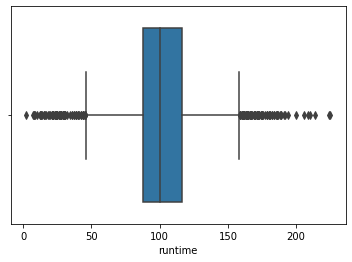

In [17]:
centralidade_e_dispersao(movies_df.runtime)

#Ratings
Média de avaliações dos usuários


 Media:  6.246748323126275

 Desvio padrao:  1.1273213300134064


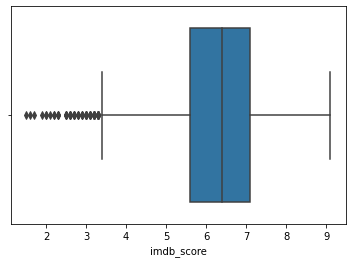

In [9]:
centralidade_e_dispersao(movies_df.imdb_score)

#Genres
Genero do filme

In [10]:
print("Moda: ", movies_df.genres.mode())

Moda:  0    ['comedy']
dtype: object


#Viewership Score

Índice de audiência


 Media:  122.79014084507043

 Desvio padrao:  213.84658095112766


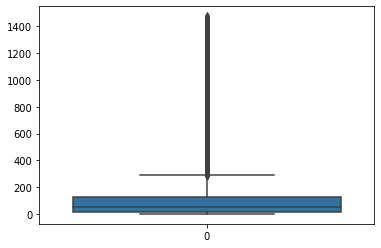

In [ ]:
centralidade_e_dispersao(daily_top10_df["Viewership Score"])

#Stock Value

Preço da ação ajustado


 Media:  105.43414864158366

 Desvio padrao:  157.05709691749655


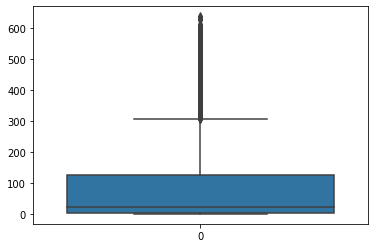

In [ ]:
centralidade_e_dispersao(stocks_df["Adj Close"])

#Medidas de centralidade e dispersão para cada variável

In [ ]:
def daily_top10_df_t (a):
    print("Medidas de Centralidade e Dispersão para ",a)
    print("Media: ",daily_top10_df[a].mean())
    print("Desvio padrão: ",daily_top10_df[a].std())
    print("Mediana: ",daily_top10_df[a].median())
    print("Variancia: ",daily_top10_df[a].var())
    print("Moda:\n",daily_top10_df[a].mode())
    print("Boxplot para ",a)
    daily_top10_df.boxplot(column=a)

Medidas de Centralidade e Dispersão para  Viewership Score
Media:  122.79014084507043
Desvio padrão:  213.86164216049602
Mediana:  50.0
Variancia:  45736.80198758405
Moda:
 0    8
dtype: int64
Boxplot para  Viewership Score


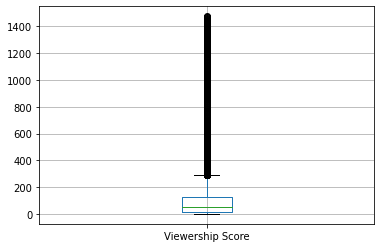

In [ ]:
daily_top10_df_t("Viewership Score")

Medidas de Centralidade e Dispersão para  Days In Top 10
Media:  24.123661971830987
Desvio padrão:  58.47378925134753
Mediana:  7.0
Variancia:  3419.184029411006
Moda:
 0    1
dtype: int64
Boxplot para  Days In Top 10


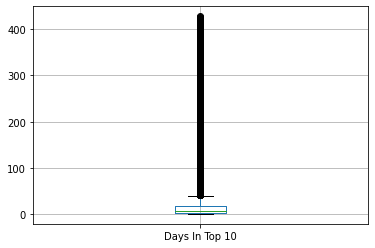

In [ ]:
daily_top10_df_t("Days In Top 10")

#Grafico de dispersão

Analisar a correlação e tendencias de duas variaveis

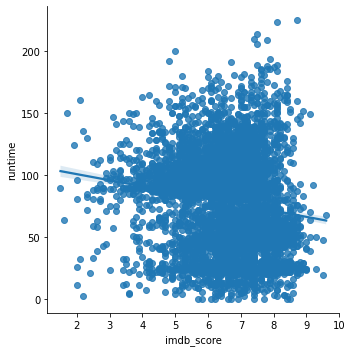

In [ ]:
sns.lmplot(data = catalog_df, x = "imdb_score", y = "runtime")

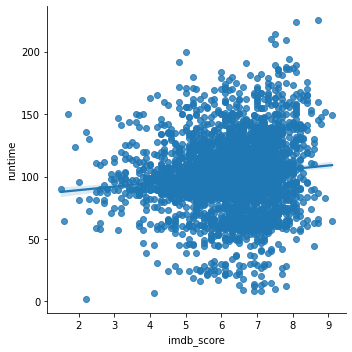

In [ ]:
sns.lmplot(data = movies_df, x = "imdb_score", y = "runtime")

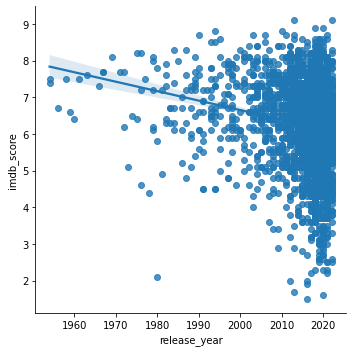

In [ ]:
sns.lmplot(data = movies_df, x = "release_year", y = "imdb_score")

#Histograma

Frequencias dos dados


<AxesSubplot:xlabel='Viewership Score', ylabel='Count'>

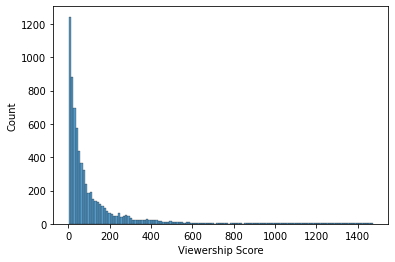

In [ ]:
sns.histplot(data=daily_top10_df, x="Viewership Score")

<AxesSubplot:xlabel='imdb_score', ylabel='Count'>

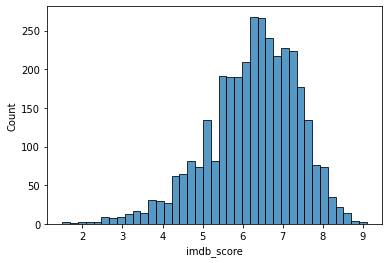

In [ ]:

sns.histplot(data=movies_df, x="imdb_score")

#Grafico de barra

<AxesSubplot:xlabel='Type', ylabel='Days In Top 10'>

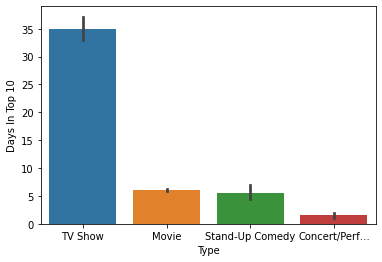

In [ ]:
sns.barplot(data=daily_top10_df, x="Type", y="Days In Top 10")

<AxesSubplot:xlabel='type', ylabel='imdb_score'>

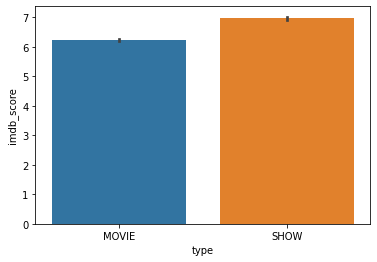

In [ ]:
sns.barplot(data = catalog_df, x="type", y="imdb_score")

## Grafico de linha


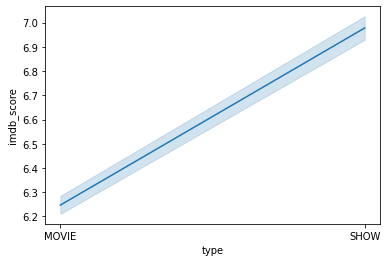

In [18]:
sns.lineplot(data=catalog_df, x="type", y="imdb_score")

# Parte 4 - Explorando agrupamentos


In [19]:
from sklearn.cluster import KMeans

## Pergunta 1: Os espectadores preferem filmes curtos, longos ou de duração média?

In [20]:
df_group1 = movies_df[['runtime', 'imdb_score']]
df_group1

,runtime,imdb_score
0,114,8.2
1,109,7.7
2,91,8.2
3,150,7.7
5,94,8.0
...,...,...
5362,25,5.6
5363,93,5.0
5364,100,6.8
5365,134,7.7


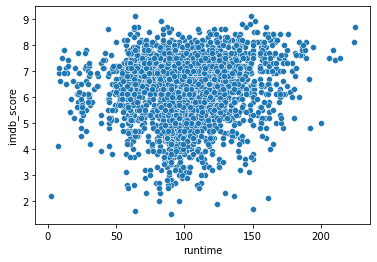

In [21]:
sns.scatterplot(data=df_group1, x="runtime", y="imdb_score")

### Aplicação do K-means:

Rodando o K-Means 1 vez:

In [ ]:
kmeans = KMeans(n_clusters=3, n_init=1).fit(df_group1)

<AxesSubplot:xlabel='runtime', ylabel='imdb_score'>

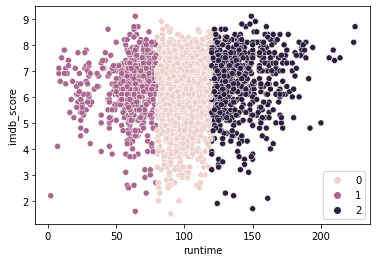

In [ ]:
sns.scatterplot(data=df_group1, x="runtime", y="imdb_score", hue=kmeans.labels_)

Rodando o K-Means 10 vezes:

In [22]:
kmeans = KMeans(n_clusters=3, n_init=10).fit(df_group1)

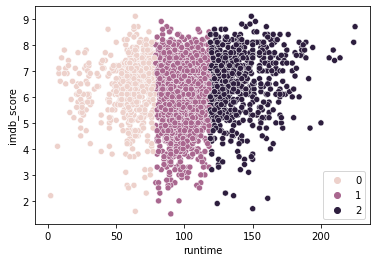

In [23]:
sns.scatterplot(data=df_group1, x="runtime", y="imdb_score", hue=kmeans.labels_)

Rodando o K-Means 100 vezes:

In [24]:
kmeans = KMeans(n_clusters=3,  n_init=100).fit(df_group1)

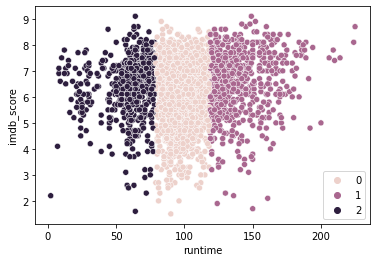

In [25]:
sns.scatterplot(data=df_group1, x="runtime", y="imdb_score", hue=kmeans.labels_)

### Conclusão:

Observa-se que os dados foram agrupados em fatias verticais ao longo do eixo x, determinadas quase que exclusivamente pelo tempo de duração de cada filme. Sendo assim, há em cada grupo a amplitude máxima de valores das notas de avaliação naquele intervalo.

Apesar de não haver grande diferença entre a primeira e a centésima iteração do algoritmo, observa-se o endireitamento das linhas de fronteira entre os grupos, que tendem a depender cada vez mais do tempo de duração.

Conclui-se, então, que na avaliação dos filmes não há influência do tempo de duração.

## Pergunta 2: O gênero influencia na duração do filme?

### Preparando os dados

Começamos selecionando as colunas a serem usadas, runtime e genre. A seguir, copia-se o dataframe, para que possam ser feitas alterações nos valores sem modificar os dados originais.

Para que seja mossível comparar as duas colunas, são necessárias as seguintes alterações ao valores da coluna genres:

1 - No caso de haver mais de um gênero listado para um único filme, será considerado somente o gênero principal, ou seja, primeiro valor da lista.

2 - Os valores em strings serão convertidos para int de acordo com a legenda:
    1 - action
    2 - crime
    ...

In [26]:
df_group2 = movies_df[['runtime', 'genres']]
df_group2 = df_group2.copy()
df_group2

,runtime,genres
0,114,"['drama', 'crime']"
1,109,"['drama', 'action', 'thriller', 'european']"
2,91,"['fantasy', 'action', 'comedy']"
3,150,"['war', 'action']"
5,94,['comedy']
...,...,...
5362,25,"['animation', 'family']"
5363,93,"['romance', 'comedy', 'drama']"
5364,100,"['romance', 'drama']"
5365,134,['drama']


In [27]:
def f(generos):
  generos = generos.split("'")
 
  if len(generos) == 1:
    return generos[0]
    
  else:
    
    return generos[1]


In [28]:
df_group2['primeiro_genero']= df_group2['genres'].apply(f)
df_group2

,runtime,genres,primeiro_genero
0,114,"['drama', 'crime']",drama
1,109,"['drama', 'action', 'thriller', 'european']",drama
2,91,"['fantasy', 'action', 'comedy']",fantasy
3,150,"['war', 'action']",war
5,94,['comedy'],comedy
...,...,...,...
5362,25,"['animation', 'family']",animation
5363,93,"['romance', 'comedy', 'drama']",romance
5364,100,"['romance', 'drama']",romance
5365,134,['drama'],drama


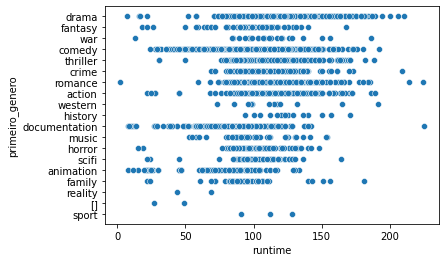

In [30]:
sns.scatterplot(data=df_group2, x="runtime", y="primeiro_genero")

In [32]:
kmeans = KMeans(n_clusters=3, n_init=10).fit(df_group2)

ValueError: ignored

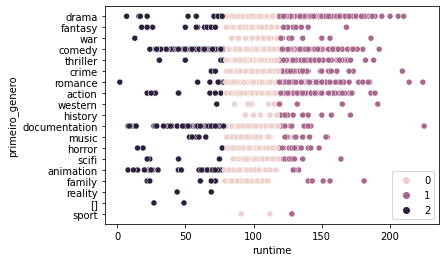

In [33]:
sns.scatterplot(data=df_group2, x="runtime", y="primeiro_genero", hue=kmeans.labels_)

In [34]:
kmeans = KMeans(n_clusters=3,  n_init=100).fit(df_group2)

ValueError: ignored

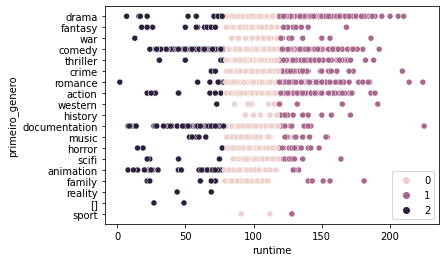

In [35]:
sns.scatterplot(data=df_group2, x="runtime", y="primeiro_genero", hue=kmeans.labels_)